# section 1

* مساله فوق یک مساله بهینه سازی محدب با یک قید تساوی می باشد که می خواهیم واریانس ماکزیمم شود . لذا با استفاده از ضرایب لاگرانژ مقدار بهینه را محاسبه می کنیم:

$$ max_u (u^TCu + λ (u^Tu -1))$$

با مشتق گیری نسبت به u خواهیم داشت:

$$Cu + λ u=0 ⇒ (C + λ I)u=0 ⇒ Cu=λu (λ⟶-λ)$$

بنابراین مساله معادل با پیدا کردن مقادیر ویژه ماتریس c می باشد.





# Section 2

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import skimage
from skimage.io import imread
from skimage.io import imshow
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
import pprint
import pandas as pd
pp = pprint.PrettyPrinter(indent=4)

In [83]:
dataPath = 'drive/MyDrive/ml/Cohn-Kanade'

In [84]:
dataPath = 'drive/My Drive/CVLab/LAB1/Data/Cohn-Kanade'
DataPath = 'drive/My Drive/CVLab/LAB1/Data/Cohn-Kanade/neutral'

### Loading images

در این قسمت، تصاویر لود می شوند و همزمان آی دی اشخاص که ۴ کاراکتر اول اسم فایل ها هستند ذخیره می شوند. برای هر تصویر، چنانچه رنگی باشد، به تصویر خاکستری (دو کاناله) تبدیل می شود. همچنین هر تصویر را به صورت برداری با ابعاد برابر ضرب طول و عرض تصویر تبدیل می کنیم.

In [85]:
images = []
ids = []
for file in os.listdir(DataPath):
    img = imread(join(DataPath, file))
    personID = file[0:4]
    if len(img.shape)==3: # if image has 3 channels convert it to grayscale
        img = rgb2gray(img)
    # reshape
    img = img.reshape(img.shape[0]*img.shape[1], 1)
    images.append(img)
    ids.append(personID)

In [86]:
# original dimension images
N1, N2 = 600, 300

In [87]:
# shape of saved images after processing
np.shape(images)

(190, 180000, 1)

### Taking 70 people for training and the rest for testing image sets:

در این بخش با استفاده از آی دی افراد که در قسمت قبلی استخراج شدند، تصاویر ۷۰ نفر به عنوان تصاویر آموزش انتخاب می شوند و از مابقی تصاویر به عنوان تصاویر تست استفاده می شوند. 

In [88]:
# identifying train and test person IDs
ids_unique = list(set(ids))
TrainPersonIDs = ids_unique[0:70]
TestPersonIDs = ids_unique[70:]
# train and test face images indexes
TrainImageIDs = []
TestImageIDs = []
for i in range(len(ids)):
    if ids[i] in TrainPersonIDs:
        TrainImageIDs.append(i)
    else:
        TestImageIDs.append(i)
# train and test images
TrainImages = [images[idx] for idx in TrainImageIDs]
TestImages = [images[idx] for idx in TestImageIDs]

TrainImages_reshaped = np.reshape(TrainImages,(np.shape(TrainImages)[0], np.shape(TrainImages)[1]))
TestImages_reshaped = np.reshape(TestImages,(np.shape(TestImages)[0], np.shape(TestImages)[1]))

In [89]:
# shape of train images
np.shape(TrainImages)

(136, 180000, 1)

### Computing the mean face and subtracting it from images

در این بخش، برای تصاویر آموزش و تست به صورت جداگانه، تصویر میانگین محاسبه شد و از هر کدام از دسته تصاویر کم شد. این تصاویر جدید (حاصل کم شدن میانگین از آن ها) در متغیرهای جدیدی ذخیره شدند که به صورت مستقیم در آموزش و تست به کار گرفته خواهند شد.

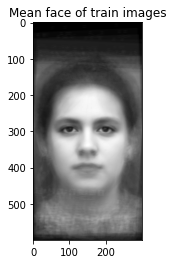

In [90]:
# mean of all train face images
m_train = np.mean(TrainImages, axis=0)
m_train_reshaped = np.reshape(m_train, (N1, N2))
plt.imshow(m_train_reshaped)
plt.set_cmap('gray')
plt.title("Mean face of train images")
# mean of all test face images
m_test = np.mean(TestImages, axis=0)
m_test_reshaped = np.reshape(m_test, (N1, N2))
plt.imshow(m_test_reshaped)

# computing phis
TrainPhis = [item-m_train for item in TrainImages]
TrainPhis = np.reshape(TrainPhis, (np.shape(TrainPhis)[0], np.shape(TrainPhis)[1]) )

TestPhis = [item-m_test for item in TestImages]
TestPhis = np.reshape(TestPhis, ( np.shape(TestPhis)[0], np.shape(TestPhis)[1]) )

### Training PCA (10 components)

در این قسمت الگوریتم کاهش بعد با تصاویر آموزش آماده شده در قسمت قبل ترین می شود. همچنین فقط ۱۰ مقدار ویژه برتر نگه داشته می شوند.





In [91]:
# training PCA
pca = PCA(n_components=10)
pca.fit(TrainPhis)
components = pca.components_

In [92]:
# reshaping eigenfaces to the image shape
eigenfaces = [np.reshape(item, (N1, N2)) for item in components]

در قسمت زیر، ۱۰ بردار ویژه برتر صورت ها نمایش داده شده اند.

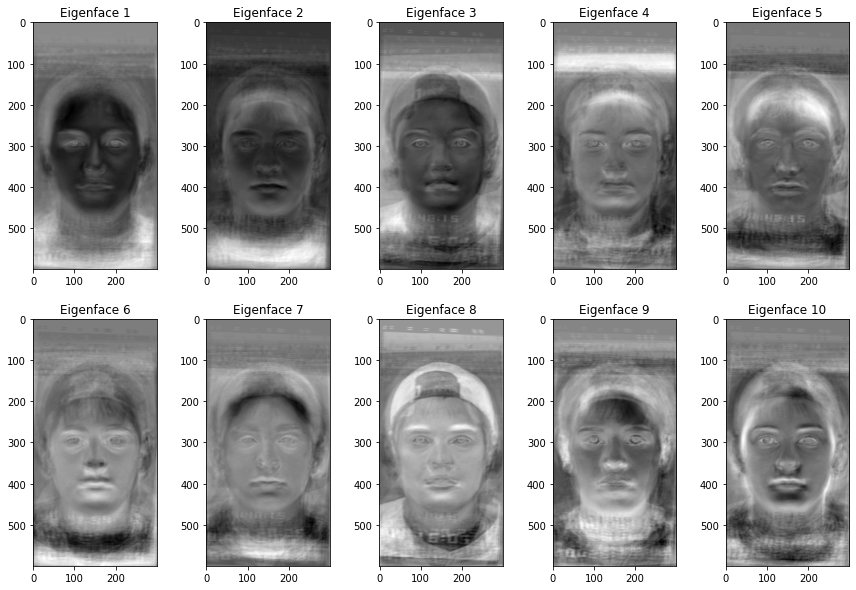

In [93]:
# plotting eigenfaces
fig, ax = plt.subplots(2, 5, figsize=(15, 10))
ax[0][0].imshow(eigenfaces[0], cmap='gray')
ax[0][0].set_title("Eigenface 1")
ax[0][1].imshow(eigenfaces[1], cmap='gray')
ax[0][1].set_title("Eigenface 2")
ax[0][2].imshow(eigenfaces[2], cmap='gray')
ax[0][2].set_title("Eigenface 3")
ax[0][3].imshow(eigenfaces[3], cmap='gray')
ax[0][3].set_title("Eigenface 4")
ax[0][4].imshow(eigenfaces[4], cmap='gray')
ax[0][4].set_title("Eigenface 5")

ax[1][0].imshow(eigenfaces[5], cmap='gray')
ax[1][0].set_title("Eigenface 6")
ax[1][1].imshow(eigenfaces[6], cmap='gray')
ax[1][1].set_title("Eigenface 7")
ax[1][2].imshow(eigenfaces[7], cmap='gray')
ax[1][2].set_title("Eigenface 8")
ax[1][3].imshow(eigenfaces[8], cmap='gray')
ax[1][3].set_title("Eigenface 9")
ax[1][4].imshow(eigenfaces[9], cmap='gray')
ax[1][4].set_title("Eigenface 10")

plt.show()

In [94]:
eigenvalues = pca.explained_variance_
print("Eigenvalues are: ")
print(eigenvalues)

Eigenvalues are: 
[1.07659334e+08 9.33346478e+07 4.33122654e+07 2.77361179e+07
 1.89126147e+07 1.86344645e+07 1.59858160e+07 1.33722071e+07
 1.19621975e+07 1.01092577e+07]


### Image Reconstruction (10 Components)

برای بازسازی تصاویر به کمک بردارهای ویژه برتر، تابعی تعریف شده است که در ورودی، تصویر، مقادیر ویژه، بردار ویژه و تصویر میانگین را می گیرد. سپس با ضرب داخلی تصویر در هر کدام از بردارهای ویژه، وزن مربوط به آن بردار ویژه به دست می آید. پس از به دست آمدن تمام وزن ها ( که ۱۰ عدد می باشند) می توان تصویر را بازسازی کرد. می دانیم هر تصویر مجموع وزن دار بردار ویژه ها با وزن های محاسبه شده است. در نهایت تصویر میانگین آموزش به این حاصل مجموع اضافه شده و تصویر نهایی بازسازی شده به این ترتیب به دست می آید.

In [95]:
#function for image reconstruction
def FaceReconstruction(image, components, eigenfaces, mean_face):
  out = 0
  weights = [np.dot(image.flatten(), eigenvector) for eigenvector in components]
  for i in range(len(components)):
    out = out + eigenfaces[i]*weights[i]
  out = out + mean_face
  return out

در این قسمت از تابع تعریف شده در بالا برای بازسازی ۵ تصویر از مجموعه تصاویر آموزش استفاده می شود و همان طور که دیده می شود نتایج بازسازی قابل قبول هستند.

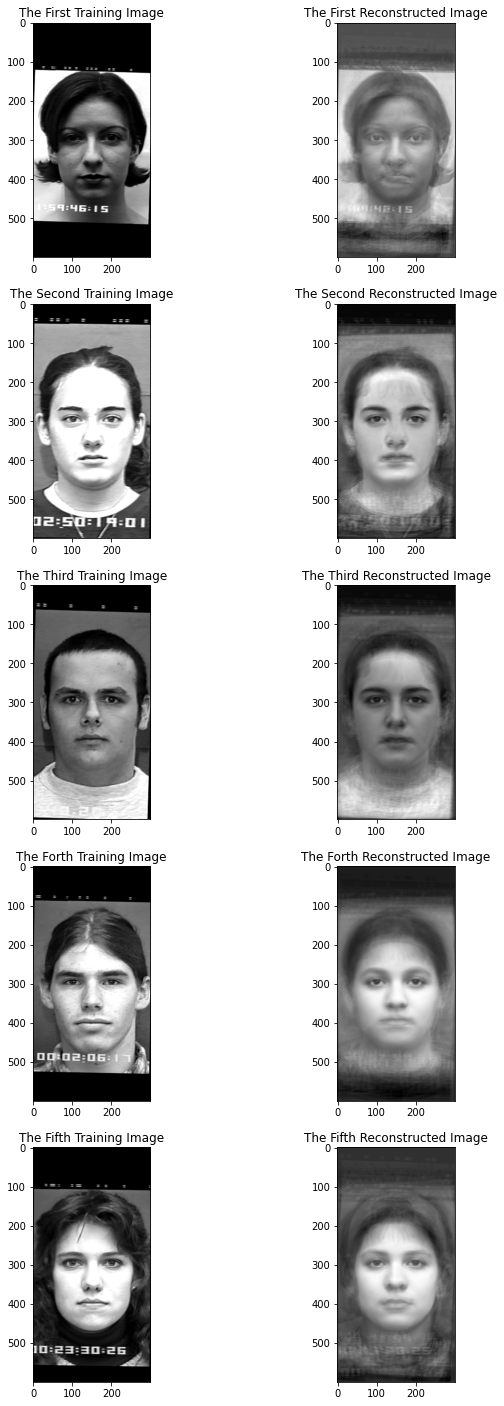

In [96]:
reconstructed_images = [FaceReconstruction(TrainPhis[i], components, eigenfaces, m_train_reshaped) for i in [0, 5, 10, 20, 30]]

# plotting
fig, ax = plt.subplots(5, 2, figsize=(10, 25))
ax[0][0].imshow(np.reshape(TrainImages[0], (N1, N2)))
ax[0][0].set_title("The First Training Image")
ax[0][1].imshow(reconstructed_images[0])
ax[0][1].set_title("The First Reconstructed Image")

ax[1][0].imshow(np.reshape(TrainImages[5], (N1, N2)))
ax[1][0].set_title("The Second Training Image")
ax[1][1].imshow(reconstructed_images[1])
ax[1][1].set_title("The Second Reconstructed Image")

ax[2][0].imshow(np.reshape(TrainImages[10], (N1, N2)))
ax[2][0].set_title("The Third Training Image")
ax[2][1].imshow(reconstructed_images[2])
ax[2][1].set_title("The Third Reconstructed Image")

ax[3][0].imshow(np.reshape(TrainImages[20], (N1, N2)))
ax[3][0].set_title("The Forth Training Image")
ax[3][1].imshow(reconstructed_images[3])
ax[3][1].set_title("The Forth Reconstructed Image")

ax[4][0].imshow(np.reshape(TrainImages[30], (N1, N2)))
ax[4][0].set_title("The Fifth Training Image")
ax[4][1].imshow(reconstructed_images[4])
ax[4][1].set_title("The Fifth Reconstructed Image")

plt.show()

### Training PCA (20 Components)

در این قسمت الگوریتم کاهش بعد با نگه داشتن ۲۰ مولفه برتر آموزش داده می شود.

In [97]:
# training PCA
pca2 = PCA(n_components=20)
pca2.fit(TrainPhis)
components2 = pca2.components_

In [98]:
eigenfaces2 = [np.reshape(item, (N1, N2)) for item in components2]

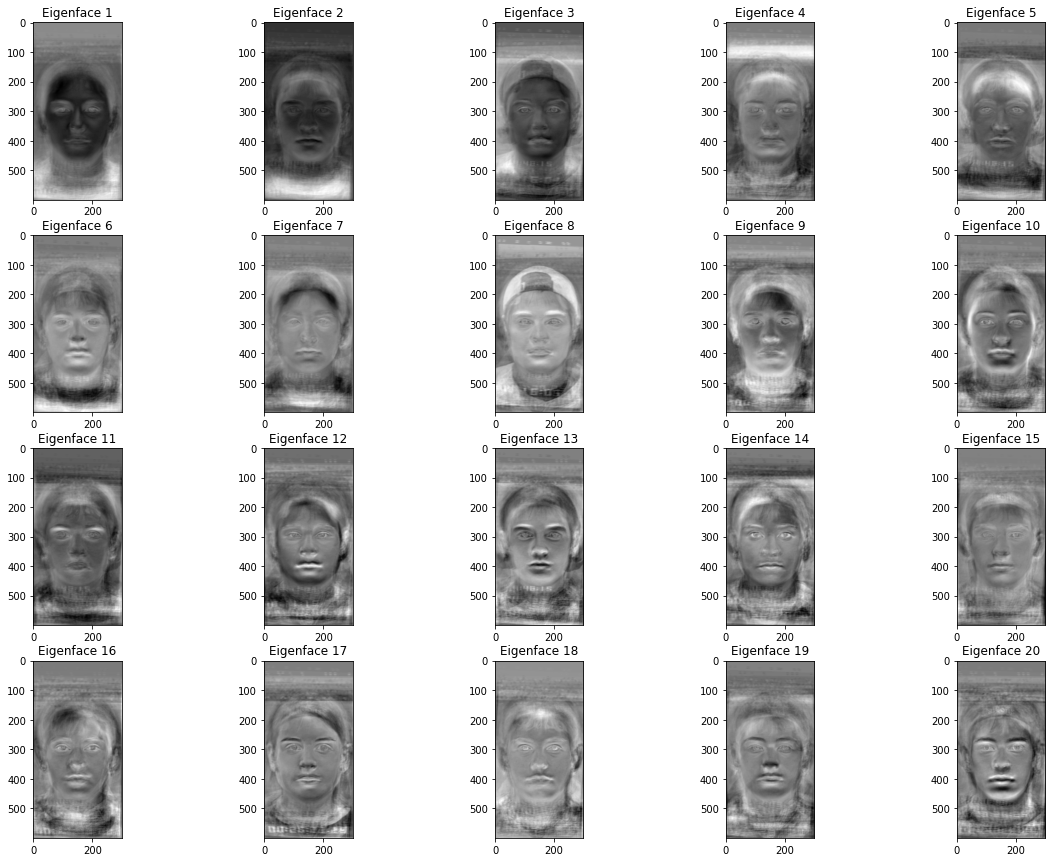

In [99]:
# plotting eigenfaces
fig, ax = plt.subplots(4, 5, figsize=(20, 15))
ax[0][0].imshow(eigenfaces2[0], cmap='gray')
ax[0][0].set_title("Eigenface 1")
ax[0][1].imshow(eigenfaces2[1], cmap='gray')
ax[0][1].set_title("Eigenface 2")
ax[0][2].imshow(eigenfaces2[2], cmap='gray')
ax[0][2].set_title("Eigenface 3")
ax[0][3].imshow(eigenfaces2[3], cmap='gray')
ax[0][3].set_title("Eigenface 4")
ax[0][4].imshow(eigenfaces2[4], cmap='gray')
ax[0][4].set_title("Eigenface 5")

ax[1][0].imshow(eigenfaces2[5], cmap='gray')
ax[1][0].set_title("Eigenface 6")
ax[1][1].imshow(eigenfaces2[6], cmap='gray')
ax[1][1].set_title("Eigenface 7")
ax[1][2].imshow(eigenfaces2[7], cmap='gray')
ax[1][2].set_title("Eigenface 8")
ax[1][3].imshow(eigenfaces2[8], cmap='gray')
ax[1][3].set_title("Eigenface 9")
ax[1][4].imshow(eigenfaces2[9], cmap='gray')
ax[1][4].set_title("Eigenface 10")

ax[2][0].imshow(eigenfaces2[10], cmap='gray')
ax[2][0].set_title("Eigenface 11")
ax[2][1].imshow(eigenfaces2[11], cmap='gray')
ax[2][1].set_title("Eigenface 12")
ax[2][2].imshow(eigenfaces2[12], cmap='gray')
ax[2][2].set_title("Eigenface 13")
ax[2][3].imshow(eigenfaces2[13], cmap='gray')
ax[2][3].set_title("Eigenface 14")
ax[2][4].imshow(eigenfaces2[14], cmap='gray')
ax[2][4].set_title("Eigenface 15")

ax[3][0].imshow(eigenfaces2[15], cmap='gray')
ax[3][0].set_title("Eigenface 16")
ax[3][1].imshow(eigenfaces2[16], cmap='gray')
ax[3][1].set_title("Eigenface 17")
ax[3][2].imshow(eigenfaces2[17], cmap='gray')
ax[3][2].set_title("Eigenface 18")
ax[3][3].imshow(eigenfaces2[18], cmap='gray')
ax[3][3].set_title("Eigenface 19")
ax[3][4].imshow(eigenfaces2[19], cmap='gray')
ax[3][4].set_title("Eigenface 20")

plt.show()

In [100]:
eigenvalues2 = pca2.explained_variance_
print("Eigenvalues are: ")
print(eigenvalues2)

Eigenvalues are: 
[1.07659334e+08 9.33346478e+07 4.33122654e+07 2.77361179e+07
 1.89126143e+07 1.86344634e+07 1.59858156e+07 1.33722007e+07
 1.19621721e+07 1.01091539e+07 8.40891003e+06 7.85255844e+06
 7.50881608e+06 7.09787562e+06 6.90601699e+06 6.15272798e+06
 5.40382400e+06 5.26627796e+06 5.18978676e+06 4.84131875e+06]


### Image Reconstruction (20 Components)

در این قسمت هم مشابه قسمت قبلی و با استفاده از تابع نوشته شده، ۵ تصویر از مجموعه تصاویر آموزش بازسازی می شوند. همان طور که دیده می شود نتایج بازسازی به وضوح از قسمت قبلی بهتر هستند که قابل انتظار بود.

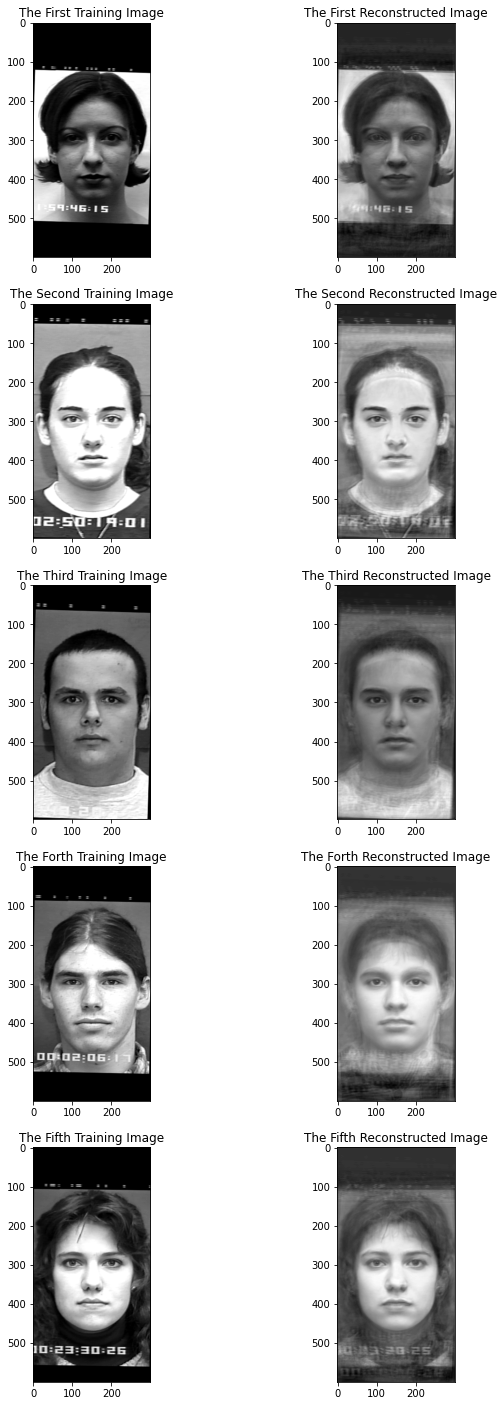

In [101]:
reconstructed_images2 = [FaceReconstruction(TrainPhis[i], components2, eigenfaces2, m_train_reshaped) for i in [0, 5, 10, 20, 30]]

# plotting
fig, ax = plt.subplots(5, 2, figsize=(10, 25))
ax[0][0].imshow(np.reshape(TrainImages[0], (N1, N2)))
ax[0][0].set_title("The First Training Image")
ax[0][1].imshow(reconstructed_images2[0])
ax[0][1].set_title("The First Reconstructed Image")

ax[1][0].imshow(np.reshape(TrainImages[5], (N1, N2)))
ax[1][0].set_title("The Second Training Image")
ax[1][1].imshow(reconstructed_images2[1])
ax[1][1].set_title("The Second Reconstructed Image")

ax[2][0].imshow(np.reshape(TrainImages[10], (N1, N2)))
ax[2][0].set_title("The Third Training Image")
ax[2][1].imshow(reconstructed_images2[2])
ax[2][1].set_title("The Third Reconstructed Image")

ax[3][0].imshow(np.reshape(TrainImages[20], (N1, N2)))
ax[3][0].set_title("The Forth Training Image")
ax[3][1].imshow(reconstructed_images2[3])
ax[3][1].set_title("The Forth Reconstructed Image")

ax[4][0].imshow(np.reshape(TrainImages[30], (N1, N2)))
ax[4][0].set_title("The Fifth Training Image")
ax[4][1].imshow(reconstructed_images2[4])
ax[4][1].set_title("The Fifth Reconstructed Image")

plt.show()

### Reconstructing Test Images

در این قسمت ۵ تصویر از تصاویر تست با استفاده از ۲۰ مولفه برتر به دست آمده از قسمت قبلی بازسازی می شوند. همان طور که دیده می شود، نتایج بازسازی دارای خطای بیشتری نسبت به قسمت های قبل هستند که قابل انتظار بود، چرا که ۲۰ مولفه برتر به دست آمده از آموزش الگورتیم مربوط به تصاویر آموزش هستند و زیرفضای مربوط به تصاویر تست با آن ها متفاوت است.

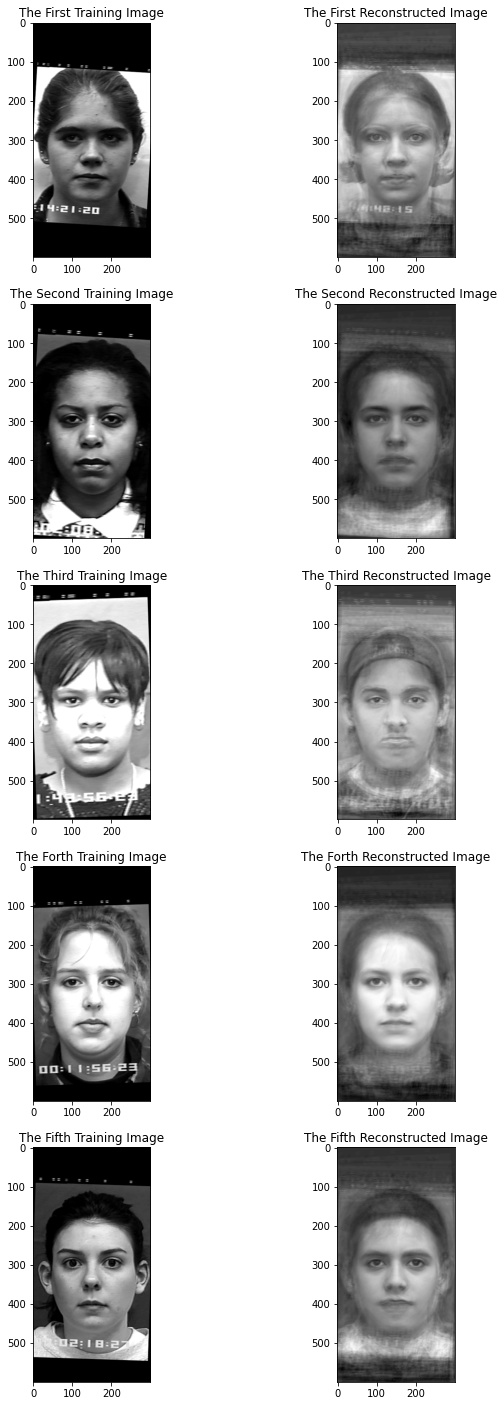

In [102]:
reconstructed_test_images = [FaceReconstruction(TestPhis[i], components2, eigenfaces2, m_test_reshaped) for i in [0, 5, 10, 15, 20]]

# plotting
fig, ax = plt.subplots(5, 2, figsize=(10, 25))
ax[0][0].imshow(np.reshape(TestImages[0], (N1, N2)))
ax[0][0].set_title("The First Training Image")
ax[0][1].imshow(reconstructed_test_images[0])
ax[0][1].set_title("The First Reconstructed Image")

ax[1][0].imshow(np.reshape(TestImages[5], (N1, N2)))
ax[1][0].set_title("The Second Training Image")
ax[1][1].imshow(reconstructed_test_images[1])
ax[1][1].set_title("The Second Reconstructed Image")

ax[2][0].imshow(np.reshape(TestImages[10], (N1, N2)))
ax[2][0].set_title("The Third Training Image")
ax[2][1].imshow(reconstructed_test_images[2])
ax[2][1].set_title("The Third Reconstructed Image")

ax[3][0].imshow(np.reshape(TestImages[15], (N1, N2)))
ax[3][0].set_title("The Forth Training Image")
ax[3][1].imshow(reconstructed_test_images[3])
ax[3][1].set_title("The Forth Reconstructed Image")

ax[4][0].imshow(np.reshape(TestImages[20], (N1, N2)))
ax[4][0].set_title("The Fifth Training Image")
ax[4][1].imshow(reconstructed_test_images[4])
ax[4][1].set_title("The Fifth Reconstructed Image")

plt.show()

# section 3

 **سوال اول**
 
در این قسمت برای ساختن زیر فضای احساسات یک ماسک مستطیلی تصویر را می پوشانیم. با امتحان تصاویر مختلف سایز ماسک را 260 در 220 تعیین نمودیم.

در ادامه برای تصاویر موجود در 3 زیر فضا الگوریتم را اجرا می کنیم و 10 تصویر ویژه برتر را به ترتیب در 3 سطر نمایش می دهیم. سطر اول تصویر ویژه متناظر با زیر فضا خوشحال به ترتیب مقدار ویژه می باشد. به همین ترتیب سطر دوم و سوم به ترتیب زیر فضای متعجب و تنقر می باشند.



57200


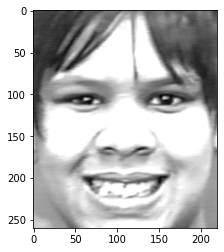

In [103]:
#set mask size
im = imread(dataPath+'/happy/S042_006_01435709_h.png',0)
masked=im[190:450,40:260]
a=masked.size
print(a)
plt.imshow(masked,cmap='gray')

In [104]:
include={'happy','disgust','surprise','neutral'}
data = dict()
data['label'] = []
data['filename'] = []
data['data'] = []   
for subdir in os.listdir(dataPath):
        if subdir in include:
            print(subdir)
            current_path = dataPath+'/' + subdir  # current path
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    #mask=np.zeros_like(im)
                    im = imread(current_path +'/' + file,0)[190:450,40:260] # read image
                    data['label'].append(subdir)
                    data['filename'].append(file)
                    data['data'].append(list(im.reshape(a)))

disgust
happy
surprise
neutral


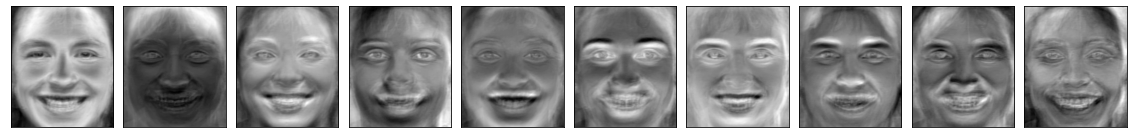

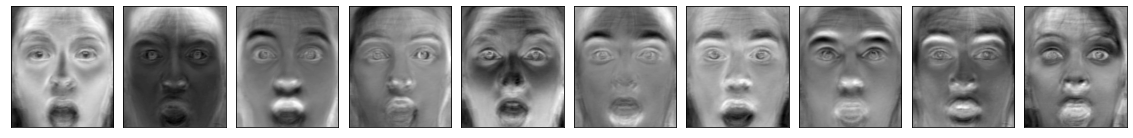

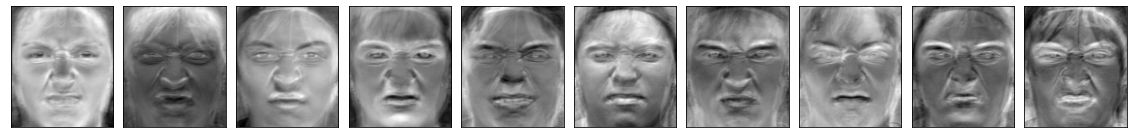

In [105]:
# 3 pca for each subset ( happy, surprise , disgust)
Ncom=20
temp=pd.DataFrame.from_dict(data)
data1=temp[(temp.label=='happy')]
aa = list(data1['data'])
X1=np.asarray(aa)
#X1=X1-X1.mean(axis=0,keepdims=True)
pca1 = PCA(n_components=Ncom)
pca1.fit(X1)

data2=temp[(temp.label=='surprise')]
aa2 = list(data2['data'])
X2=np.asarray(aa2)
pca2 = PCA(n_components=Ncom)
pca2.fit(X2) 

data3=temp[(temp.label=='disgust')]
aa3 = list(data3['data'])
X3=np.asarray(aa3)
pca3 = PCA(n_components=Ncom)
pca3.fit(X3) 

#print(pca.explained_variance_)
#print(pca.components_[0])
fig, axes = plt.subplots(1, 10, figsize=(20, 60))
#fig.suptitle('happy eigeonfaces')
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i, ax in enumerate(axes.flat):
   ax.imshow(pca1.components_[i].reshape(260,220), cmap='binary')
   ax.set_xticks([])
   ax.set_yticks([])

fig, axes = plt.subplots(1, 10, figsize=(20, 60))
#fig.suptitle('surprise eigeonfaces')
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i, ax in enumerate(axes.flat):
   ax.imshow(pca2.components_[i].reshape(260,220), cmap='binary')
   ax.set_xticks([])
   ax.set_yticks([])

fig, axes = plt.subplots(1, 10, figsize=(20, 60))
#fig.suptitle('disgust eigeonfaces')
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i, ax in enumerate(axes.flat):
   ax.imshow(pca3.components_[i].reshape(260,220), cmap='binary')
   ax.set_xticks([])
   ax.set_yticks([])

**سوال دوم**

حال 10 تصویر خنثی و رندوم را به 3 زیر فضای فوق تصویر می کنیم و نمایش می دهیم. 

سطر اول تصویر اصلی بوده و 3 سطر بعدی به ترتیب تصویر آن در 3 زیر فضای خوشحال ، متعجب و تنفر می باشد.
با در نظر گرفتن تقریبا همه تصاویر ویژه می بینیم. که هویت افراد تا حدودی حفظ شده است اما فرم صورت و حالت آن به احساس متناظر تغییر یافته است. برای مثال تمام تصاویر تصویر شده در زیرفضای خوشحال خوشحال شده اند.

به طور کلی تمام اجزای صورت ها دچار تغییر شده اند اما بیشترین تغییر را فرم لب ها دارد که نقشی کلیدی در بیان احساس در همه زیرفضای احساسات دارد.

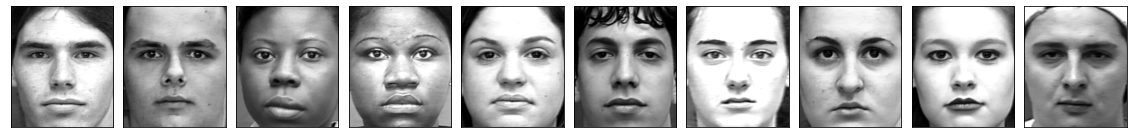

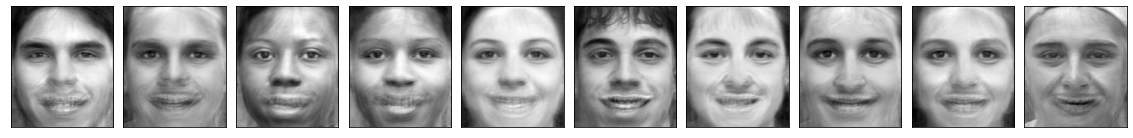

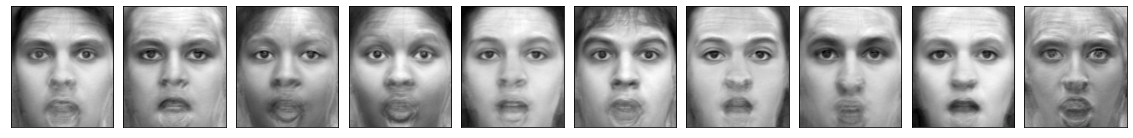

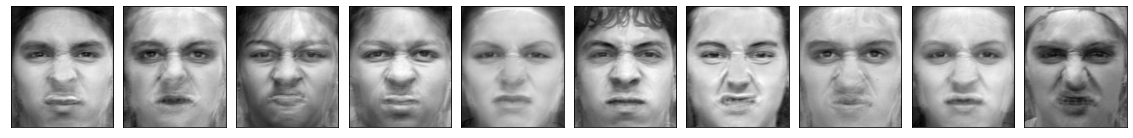

In [106]:
# reconstruct 10 random neutral image in each subspace
import random
datan=temp[(temp.label=='neutral')]
aa = list(datan['data'])
X=np.asarray(aa)
#print((pca1.transform(X1[0:1])))
imnum=random.sample(range(X.shape[0]),10)


fig, axes = plt.subplots(1, 10, figsize=(20, 60))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i, ax in enumerate(axes.flat):
   ax.imshow((X[imnum[i]:imnum[i]+1]).reshape(260,220),cmap='gray')
   ax.set_xticks([])
   ax.set_yticks([])

fig, axes = plt.subplots(1, 10, figsize=(20, 60))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i, ax in enumerate(axes.flat):
   ax.imshow(pca1.inverse_transform(pca1.transform(X[imnum[i]:imnum[i]+1])).reshape(260,220),cmap='gray')
   ax.set_xticks([])
   ax.set_yticks([])

fig, axes = plt.subplots(1, 10, figsize=(20, 60))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i, ax in enumerate(axes.flat):
   ax.imshow(pca2.inverse_transform(pca2.transform(X[imnum[i]:imnum[i]+1])).reshape(260,220),cmap='gray')
   ax.set_xticks([])
   ax.set_yticks([])

fig, axes = plt.subplots(1, 10, figsize=(20, 60))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i, ax in enumerate(axes.flat):
   ax.imshow(pca3.inverse_transform(pca3.transform(X[imnum[i]:imnum[i]+1])).reshape(260,220),cmap='gray')
   ax.set_xticks([])
   ax.set_yticks([])